In [1]:
print("hello world")

hello world


In [16]:
# import torch
# import torch.nn as nn

# # Simple sentence: "the cat sat"
# # We'll represent each word as a vector

# # Let's say each word is embedded as a 4-dimensional vector
# embedding_dim = 4

# # 3 words in our sentence
# sentence_length = 3

# # Random embeddings for our 3 words
# embeddings = torch.randn(sentence_length, embedding_dim)
# print("Input embeddings (3 words, 4 dimensions each):")
# print(embeddings)
# print(f"Shape: {embeddings.shape}")

In [ ]:
# pip uninstall torch torchvision torchaudio -y

Found existing installation: torchvision 0.24.1+cpu
Uninstalling torchvision-0.24.1+cpu:
  Successfully uninstalled torchvision-0.24.1+cpu
Found existing installation: torchaudio 2.9.1+cpu
Uninstalling torchaudio-2.9.1+cpu:
  Successfully uninstalled torchaudio-2.9.1+cpu
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124

Looking in indexes: https://download.pytorch.org/whl/cu124
     ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
      --------------------------------------- 0.2/6.2 MB 4.6 MB/s eta 0:00:02
     --- ------------------------------------ 0.5/6.2 MB 6.3 MB/s eta 0:00:01
     -------- ------------------------------- 1.3/6.2 MB 10.5 MB/s eta 0:00:01
     ----------------------- ---------------- 3.6/6.2 MB 20.7 MB/s eta 0:00:01
     ---------------------------------------  6.2/6.2 MB 28.2 MB/s eta 0:00:01
     ---------------------------------------- 6.2/6.2 MB 28.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.5 GB ? eta -:--:--
   ---------------------------------------- 0.0/2.5 GB 78.2 MB/s eta 0:00:33
   ---------------------------------------- 0.0/2.5 GB 80.2 MB/s eta 0:00:32
   ---------------------------------------- 0.0/2.5 GB 40.6 MB/s eta 0:01:03
   ---------------------------------------- 0.0/2.5 GB 37.8 MB/s eta 0:01:07
   ------------------


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import torch
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
print(f"CUDA version: {torch.version.cuda}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")

PyTorch version: 2.6.0+cu124
CUDA available: True
CUDA version: 12.4
GPU: NVIDIA GeForce RTX 3090


In [4]:
import torch
import torch.nn as nn

# Simple sentence: "the cat sat"
# We'll represent each word as a vector

# Let's say each word is embedded as a 4-dimensional vector
embedding_dim = 4

# 3 words in our sentence
sentence_length = 3

# Random embeddings for our 3 words
embeddings = torch.randn(sentence_length, embedding_dim)
print("Input embeddings (3 words, 4 dimensions each):")
print(embeddings)
print(f"Shape: {embeddings.shape}")

Input embeddings (3 words, 4 dimensions each):
tensor([[ 0.6004, -0.3931,  0.0068, -0.2397],
        [ 1.6680, -1.6841,  0.0309,  0.3061],
        [-2.0405,  0.4981, -1.3443, -0.5894]])
Shape: torch.Size([3, 4])


In [5]:
# Each word asks: "How relevant is every other word to me?"

# We need 3 weight matrices: Query, Key, Value
# (This is the Q, K, V you hear about)

d_k = embedding_dim  # dimension of keys/queries

# Simple linear projections
W_q = torch.randn(embedding_dim, d_k)  # Query weights
W_k = torch.randn(embedding_dim, d_k)  # Key weights  
W_v = torch.randn(embedding_dim, d_k)  # Value weights

# Project embeddings to Q, K, V
Q = embeddings @ W_q  # Queries
K = embeddings @ W_k  # Keys
V = embeddings @ W_v  # Values

print("Queries:", Q.shape)
print("Keys:", K.shape)
print("Values:", V.shape)

Queries: torch.Size([3, 4])
Keys: torch.Size([3, 4])
Values: torch.Size([3, 4])


In [6]:
# Attention score = how much each word should attend to others
# Formula: Attention(Q, K, V) = softmax(Q @ K^T / sqrt(d_k)) @ V

# Step 1: Q @ K^T (dot product of queries and keys)
attention_scores = Q @ K.T
print("\nAttention scores (before scaling):")
print(attention_scores)

# Step 2: Scale by sqrt(d_k)
attention_scores = attention_scores / (d_k ** 0.5)
print("\nScaled attention scores:")
print(attention_scores)

# Step 3: Softmax to get attention weights (sum to 1)
attention_weights = torch.softmax(attention_scores, dim=-1)
print("\nAttention weights (after softmax):")
print(attention_weights)
print("\nEach row sums to 1:", attention_weights.sum(dim=-1))

# Step 4: Apply weights to Values
output = attention_weights @ V
print("\nOutput after attention:")
print(output)
print(f"Shape: {output.shape}")


Attention scores (before scaling):
tensor([[-0.5034, -1.4120,  1.0945],
        [ 2.1669, 10.4661, -2.3282],
        [ 0.9184,  7.2766, -2.7163]])

Scaled attention scores:
tensor([[-0.2517, -0.7060,  0.5473],
        [ 1.0835,  5.2331, -1.1641],
        [ 0.4592,  3.6383, -1.3582]])

Attention weights (after softmax):
tensor([[0.2592, 0.1646, 0.5762],
        [0.0155, 0.9829, 0.0016],
        [0.0397, 0.9538, 0.0064]])

Each row sums to 1: tensor([1.0000, 1.0000, 1.0000])

Output after attention:
tensor([[ 0.7972,  0.0284, -0.5744,  0.5571],
        [-2.7763, -0.0682, -2.3292,  1.0037],
        [-2.6976, -0.0731, -2.2783,  0.9719]])
Shape: torch.Size([3, 4])


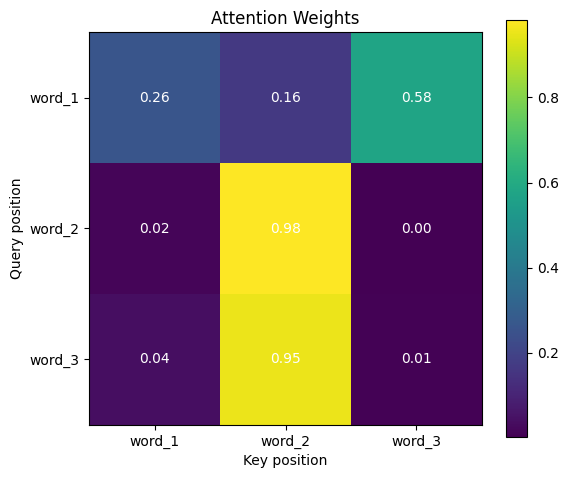

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
plt.imshow(attention_weights.detach().numpy(), cmap='viridis')
plt.colorbar()
plt.xlabel('Key position')
plt.ylabel('Query position')
plt.title('Attention Weights')
plt.xticks([0, 1, 2], ['word_1', 'word_2', 'word_3'])
plt.yticks([0, 1, 2], ['word_1', 'word_2', 'word_3'])

# Add values as text
for i in range(3):
    for j in range(3):
        plt.text(j, i, f'{attention_weights[i, j]:.2f}', 
                ha='center', va='center', color='white')

plt.tight_layout()
plt.show()

In [9]:
# pip install matplotlib

In [11]:
import torch
import torch.nn as nn

class MultiHeadAttention(nn.Module):
    def __init__(self, embedding_dim, num_heads):
        super().__init__()
        assert embedding_dim % num_heads == 0, "embedding_dim must be divisible by num_heads"
        
        self.embedding_dim = embedding_dim
        self.num_heads = num_heads
        self.head_dim = embedding_dim // num_heads
        
        # Single projections for all heads (more efficient)
        self.W_q = nn.Linear(embedding_dim, embedding_dim, bias=False)
        self.W_k = nn.Linear(embedding_dim, embedding_dim, bias=False)
        self.W_v = nn.Linear(embedding_dim, embedding_dim, bias=False)
        
        # Output projection
        self.W_o = nn.Linear(embedding_dim, embedding_dim, bias=False)
    
    def forward(self, x):
        batch_size, seq_len, embedding_dim = x.shape
        
        # Create Q, K, V
        Q = self.W_q(x)  # [batch, seq_len, embedding_dim]
        K = self.W_k(x)
        V = self.W_v(x)
        
        # Reshape to split into multiple heads
        # [batch, seq_len, embedding_dim] -> [batch, seq_len, num_heads, head_dim]
        Q = Q.view(batch_size, seq_len, self.num_heads, self.head_dim)
        K = K.view(batch_size, seq_len, self.num_heads, self.head_dim)
        V = V.view(batch_size, seq_len, self.num_heads, self.head_dim)
        
        # Transpose for attention computation
        # [batch, seq_len, num_heads, head_dim] -> [batch, num_heads, seq_len, head_dim]
        Q = Q.transpose(1, 2)
        K = K.transpose(1, 2)
        V = V.transpose(1, 2)
        
        # Compute attention for all heads simultaneously
        attention_scores = Q @ K.transpose(-2, -1) / (self.head_dim ** 0.5)
        attention_weights = torch.softmax(attention_scores, dim=-1)
        
        # Apply attention to values
        attended = attention_weights @ V  # [batch, num_heads, seq_len, head_dim]
        
        # Concatenate heads
        # [batch, num_heads, seq_len, head_dim] -> [batch, seq_len, num_heads, head_dim]
        attended = attended.transpose(1, 2)
        
        # [batch, seq_len, num_heads, head_dim] -> [batch, seq_len, embedding_dim]
        attended = attended.contiguous().view(batch_size, seq_len, embedding_dim)
        
        # Final output projection
        output = self.W_o(attended)
        
        return output, attention_weights


# Test it
embedding_dim = 64
num_heads = 8
seq_len = 10
batch_size = 2

# Create some random embeddings
x = torch.randn(batch_size, seq_len, embedding_dim)

# Apply multi-head attention
mha = MultiHeadAttention(embedding_dim, num_heads)
output, weights = mha(x)

print(f"Input shape: {x.shape}")
print(f"Output shape: {output.shape}")
print(f"Attention weights shape: {weights.shape}")
print(f"\nNum heads: {num_heads}")
print(f"Head dimension: {embedding_dim // num_heads}")

Input shape: torch.Size([2, 10, 64])
Output shape: torch.Size([2, 10, 64])
Attention weights shape: torch.Size([2, 8, 10, 10])

Num heads: 8
Head dimension: 8


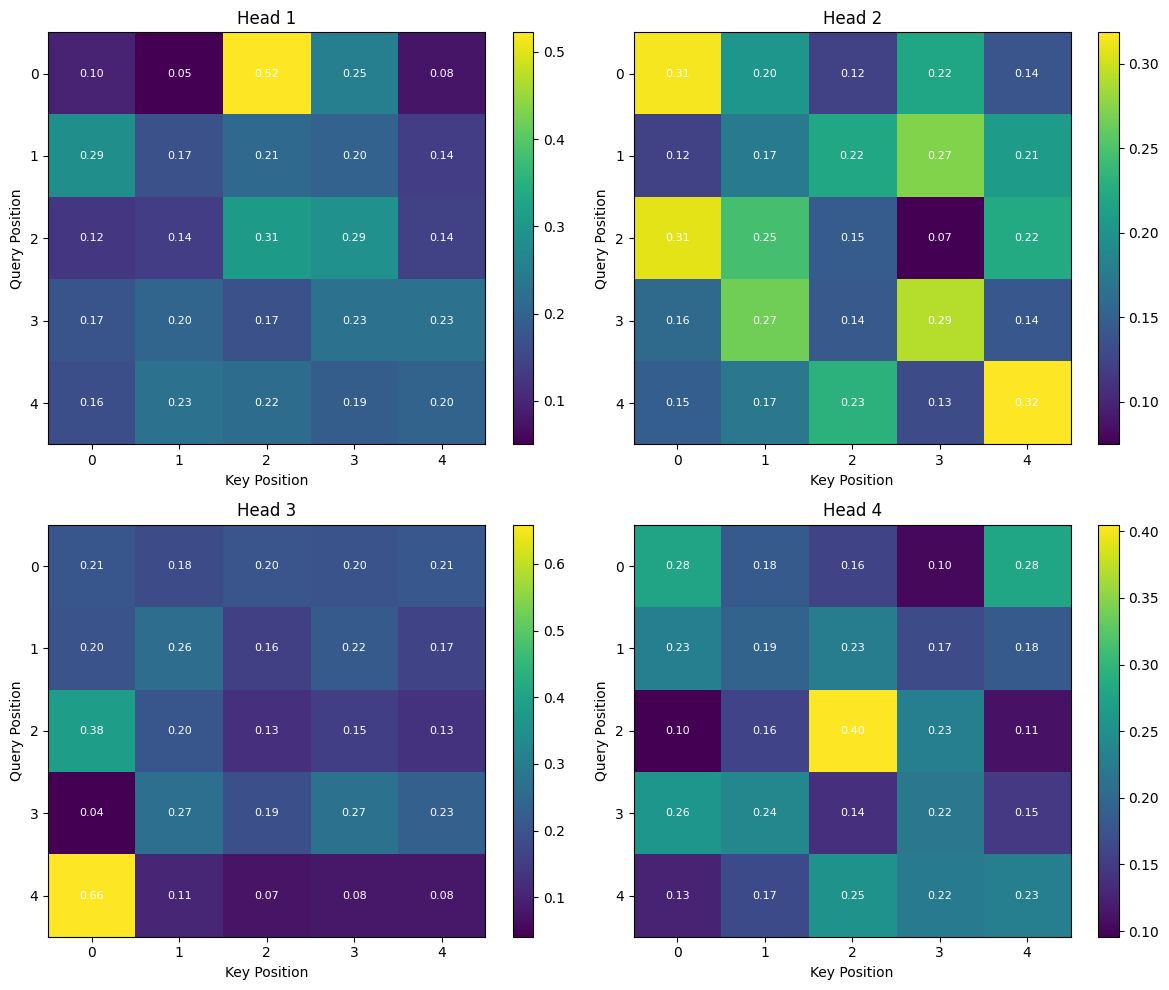

Notice: Each head learns different attention patterns!


In [12]:
import matplotlib.pyplot as plt

# Simple example with 4 heads
embedding_dim = 16
num_heads = 4
seq_len = 5

x = torch.randn(1, seq_len, embedding_dim)
mha = MultiHeadAttention(embedding_dim, num_heads)
output, weights = mha(x)

# Plot each head's attention pattern
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for head_idx in range(num_heads):
    ax = axes[head_idx]
    
    # Get attention for this head
    head_attention = weights[0, head_idx].detach().numpy()
    
    im = ax.imshow(head_attention, cmap='viridis', aspect='auto')
    ax.set_title(f'Head {head_idx + 1}')
    ax.set_xlabel('Key Position')
    ax.set_ylabel('Query Position')
    
    # Add colorbar
    plt.colorbar(im, ax=ax)
    
    # Add values
    for i in range(seq_len):
        for j in range(seq_len):
            text = ax.text(j, i, f'{head_attention[i, j]:.2f}',
                          ha="center", va="center", color="white", fontsize=8)

plt.tight_layout()
plt.show()

print("Notice: Each head learns different attention patterns!")

In [13]:
# Simple vocabulary
vocab = {
    '<PAD>': 0, 'the': 1, 'cat': 2, 'sat': 3, 
    'on': 4, 'mat': 5, 'dog': 6, 'ran': 7
}
vocab_size = len(vocab)
embedding_dim = 16
num_heads = 4

# Embedding layer
embedding = nn.Embedding(vocab_size, embedding_dim)

# Multi-head attention
mha = MultiHeadAttention(embedding_dim, num_heads)

# Sentence: "the cat sat on mat"
tokens = torch.tensor([[1, 2, 3, 4, 5]])  # Add batch dimension

# Get embeddings
embeddings = embedding(tokens)  # [1, 5, 16]
print(f"Embeddings shape: {embeddings.shape}")

# Apply multi-head attention
output, weights = mha(embeddings)
print(f"Output shape: {output.shape}")
print(f"Attention weights shape: {weights.shape}")

# Each head learned different patterns
print("\nHead 0 attention (example):")
print(weights[0, 0])  # First batch, first head

Embeddings shape: torch.Size([1, 5, 16])
Output shape: torch.Size([1, 5, 16])
Attention weights shape: torch.Size([1, 4, 5, 5])

Head 0 attention (example):
tensor([[0.3021, 0.1886, 0.1950, 0.1720, 0.1424],
        [0.2292, 0.1838, 0.2029, 0.2150, 0.1691],
        [0.1527, 0.2029, 0.1907, 0.2057, 0.2480],
        [0.4519, 0.1791, 0.1678, 0.1249, 0.0763],
        [0.2067, 0.1877, 0.1955, 0.1623, 0.2477]], grad_fn=<SelectBackward0>)


In [17]:
import torch
import torch.nn as nn

embedding_dim = 64
num_heads = 8
head_dim = embedding_dim // num_heads  # 8

# Simulated output from each head
seq_len = 5

# Create all 8 heads
head_outputs = [torch.randn(1, seq_len, head_dim) for _ in range(num_heads)]

print("Individual head outputs:")
print(f"Head 1 shape: {head_outputs[0].shape}")
print(f"Head 2 shape: {head_outputs[1].shape}")
print(f"Number of heads created: {len(head_outputs)}")

# Concatenate all 8 heads along the last dimension
all_heads = torch.cat(head_outputs, dim=-1)

print(f"\nAfter concatenating {num_heads} heads: {all_heads.shape}")
# Should be [1, 5, 64] = [batch, seq_len, 8 heads × 8 dim]

# Then output projection
W_o = nn.Linear(embedding_dim, embedding_dim)
final_output = W_o(all_heads)

print(f"Final unified output: {final_output.shape}")  # [1, 5, 64]
print("\nSuccess! All 8 heads concatenated correctly.")

Individual head outputs:
Head 1 shape: torch.Size([1, 5, 8])
Head 2 shape: torch.Size([1, 5, 8])
Number of heads created: 8

After concatenating 8 heads: torch.Size([1, 5, 64])
Final unified output: torch.Size([1, 5, 64])

Success! All 8 heads concatenated correctly.


In [18]:
import torch
import torch.nn as nn

class MultiHeadAttentionDetailed(nn.Module):
    def __init__(self, embedding_dim, num_heads):
        super().__init__()
        self.embedding_dim = embedding_dim
        self.num_heads = num_heads
        self.head_dim = embedding_dim // num_heads
        
        self.W_q = nn.Linear(embedding_dim, embedding_dim, bias=False)
        self.W_k = nn.Linear(embedding_dim, embedding_dim, bias=False)
        self.W_v = nn.Linear(embedding_dim, embedding_dim, bias=False)
        self.W_o = nn.Linear(embedding_dim, embedding_dim, bias=False)
    
    def forward(self, x):
        batch_size, seq_len, _ = x.shape
        
        Q = self.W_q(x)
        K = self.W_k(x)
        V = self.W_v(x)
        
        # Reshape to separate heads
        Q = Q.view(batch_size, seq_len, self.num_heads, self.head_dim).transpose(1, 2)
        K = K.view(batch_size, seq_len, self.num_heads, self.head_dim).transpose(1, 2)
        V = V.view(batch_size, seq_len, self.num_heads, self.head_dim).transpose(1, 2)
        
        # Attention for each head independently
        attention_scores = Q @ K.transpose(-2, -1) / (self.head_dim ** 0.5)
        attention_weights = torch.softmax(attention_scores, dim=-1)
        attended = attention_weights @ V
        
        print(f"After attention, shape: {attended.shape}")
        print(f"  = [batch={batch_size}, num_heads={self.num_heads}, seq_len={seq_len}, head_dim={self.head_dim}]")
        
        # CONCATENATE: Merge all heads
        attended = attended.transpose(1, 2).contiguous()
        print(f"\nAfter transpose: {attended.shape}")
        
        attended = attended.view(batch_size, seq_len, self.embedding_dim)
        print(f"After concatenating heads: {attended.shape}")
        print(f"  = [batch={batch_size}, seq_len={seq_len}, embedding_dim={self.embedding_dim}]")
        
        # COMBINE: Output projection
        output = self.W_o(attended)
        print(f"\nAfter output projection (W_o): {output.shape}")
        print("  → Single unified representation with all perspectives combined!")
        
        return output, attention_weights


# Demo
x = torch.randn(1, 5, 64)  # 1 batch, 5 tokens, 64 dimensions
mha = MultiHeadAttentionDetailed(embedding_dim=64, num_heads=8)

print("Input shape:", x.shape)
print("\n" + "="*60)
output, weights = mha(x)
print("="*60)
print(f"\nFinal output shape: {output.shape}")
print("All 8 perspectives have been combined into ONE representation!")

Input shape: torch.Size([1, 5, 64])

After attention, shape: torch.Size([1, 8, 5, 8])
  = [batch=1, num_heads=8, seq_len=5, head_dim=8]

After transpose: torch.Size([1, 5, 8, 8])
After concatenating heads: torch.Size([1, 5, 64])
  = [batch=1, seq_len=5, embedding_dim=64]

After output projection (W_o): torch.Size([1, 5, 64])
  → Single unified representation with all perspectives combined!

Final output shape: torch.Size([1, 5, 64])
All 8 perspectives have been combined into ONE representation!
